<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Data Analysis with Python: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Model Evaluation and Refinement</a></li>
</a></li>
</div>

<hr>


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [48]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [49]:
# Import the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets


Download the dataset by running the cell below.


In [50]:
import piplite
await piplite.install('seaborn')

In [51]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [52]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [54]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [55]:
df = pd.read_csv(file_name)

I use the method <code>head</code> to display the first 5 columns of the dataframe.


In [56]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Display the data types of each column using the function dtypes. 


In [57]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

I use the method describe to obtain a statistical summary of the dataframe.


In [58]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Explanation
Based on the number of rows in counts, there are missing values in the <code>"bedrooms"</code> and <code>"bathrooms"</code> columns where <code>"bedrooms"</code> only have 21,600 rows while <code>"bathrooms"</code> only have 21,603 rows. Where the number of rows is smaller than the total rows of 21,613.

# Data Wrangling


Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>. The <code>"id"</code> and <code>"Unnamed: 0"</code> columns are deleted because they are redundant or non-informative. Then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. 


In [59]:
df.dropna(subset=["id", "Unnamed: 0"], axis=0, inplace=True)
df = df.dropna(subset=["id", "Unnamed: 0"], axis=0)

In [60]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


#### Explanation
Based on the calculated missing values, there are 13 missing values in the <code>'bedrooms'</code> column and 10 missing values in the <code>'bathrooms</code> column.

Replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [61]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

Also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [62]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

Then check if there are still missing values

In [63]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


#### Explanation
We can see that there are no more missing value 

# Exploratory Data Analysis


Discrete columns such as the <code>'floor'</code> column can be used to determine the distribution of data by using <code>value_counts</code> to count the number of houses with unique floor values and using the <code>.to_frame()</code> method to convert it to a data frame.

In [64]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#### Explanation
It was found that single-floored houses had the highest number of houses

<code>Boxplot</code> is used to compare the prices of houses with or without waterfront views as this is an advanced step in EDA that aims to understand the distribution of house prices in relation to specific features

<AxesSubplot:xlabel='waterfront', ylabel='price'>

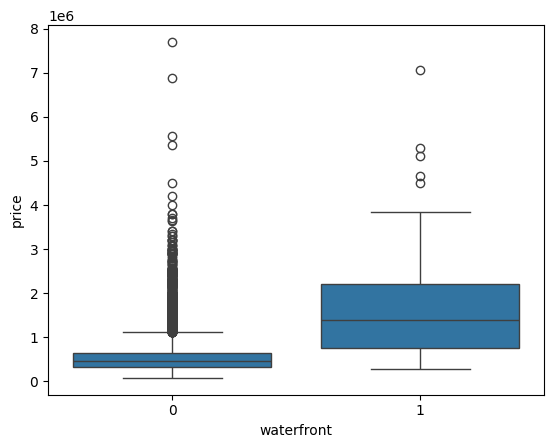

In [65]:
import seaborn as sns
sns.boxplot (x="waterfront", y="price", data=df)

#### Explanation
Houses without waterfront views tend to have lower prices, with the boxplot densely packed in the lower price range (around 0 - 1 million dollars) and the median price at the bottom of the price axis. However, there are many outliers indicating that there are some houses with much higher prices, possibly due to other factors such as location, size, or additional features. On the other hand, waterfront view houses have a higher median price and a wider price distribution, with a longer range between quartiles (Q1 to Q3). Although there are outliers, they are fewer in number than houses without waterfront view, suggesting that the price variation of houses with waterfront view is more controlled despite being in a higher price range.

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Both features can have a significant correlation in the context of house prices. In property data analysis, square footage is often a determining factor of house prices, so exploring this relationship could provide deeper insights.


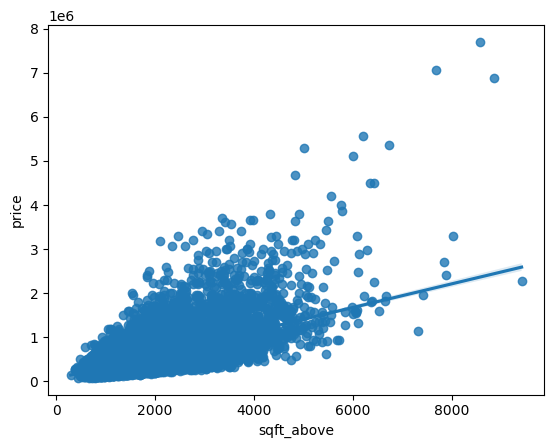

In [66]:
sns.regplot (x='sqft_above', y='price', data=df)
plt.ylim=(0, )

#### Explanation
There is a strong positive correlation between square footage of house and house prices, where the larger the square footage of house, the higher the house prices tend to be.The trend line shows an increase in price as square footage house increases, although the distribution of data points around the line indicates that there are variations in price influenced by other factors such as location, amenities, house condition, and time of sale. This correlation has several important implications: for buyers, land size is a factor to consider in determining their budget; for property agents and investors, this trend helps in analyzing the market and predicting prices; and for property developers, this information is useful in determining the optimal square footage house and competitive selling price. However, keep in mind that square footage house is not the only factor that determines price, as economic conditions, location and other factors also play an important role. The accuracy of the analysis also depends on the quality and representativeness of the data used.

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [46]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

correlation = df.corr()
correlation_with_price = correlation['price']  # Korelasi fitur dengan harga
print(correlation_with_price.sort_values(ascending=False))  # Menampilkan korelasi dengan harga, diurutkan

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Unnamed: 0       0.027372
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


# Model Development


In the Model Development stage, we can fit (train) a linear regression model using the longitude (<code>'long'</code> column) and house price (<code>'price'</code> column) features to calculate the R² (R-squared) value.

In [67]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

#### Explanation
The R² result of 0.00046769430149007363 shows that the linear regression model using longitude shows almost no ability to explain the variation in house price data. This very small R² number means that longitude has almost no relationship to house prices in this dataset.

We can also fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. 


In [68]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

#### Explanation
The result of R² = 0.4928 shows that about 49.28% of the variation in house prices (Y) can be explained by the building area variable (sqft_living or X) in this linear regression model. This means that the building area has an effect on house prices, but there is still 50.72% of the price variation that cannot be explained by this variable. Other factors, such as location, house condition, additional features, and land size, may have a greater effect on house prices.

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [33]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",
           "sqft_living15","sqft_above","grade","sqft_living"]

Then calculate the R^2. 

In [69]:
X2=df[features]
Y2=df['price']
lm.fit(X2,Y2)
lm.score(X2,Y2)

0.6576890354915759

#### Explanation
The R² result of 0.6577 indicates that about 65.77% of the variation in house prices can be explained by the features selected in the model. This value indicates that the model has a better ability in predicting house prices compared to the previous model that only used the longitude feature, which had a much lower R².

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [70]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. By using scaling and polynomial features, the model's ability to capture more complex patterns and ensure that the data is in an optimal form for the model is improved.

In [71]:
pipe=Pipeline(Input)
pipe

X = df[features]
Y = df['price']
pipe.fit(X,Y)
pipe.score(X,Y)

0.7512051345272872

#### Explanation
The R² value of 0.7512 indicates that the model you created has a fairly good performance. This means that this model can explain about 75% of the variability in house prices based on the selected features. This is a relatively good result, especially when compared to lower or higher R² values, which depend on the context and purpose of the analysis.

# Model Evaluation and Refinement


Import the necessary modules:


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In the Model Evaluation and Refinement stage, the data devided into two sets, the training set and the test set. This is so that the trained model not only learns from the data, but also tests how well it can predict data that has never been seen before.

In [73]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


#### Explanation 
The data split of 15% for testing and 85% for training resulted in 3242 test data and 18371 training data. This split ensures that the model is trained with enough data and tested on data not involved in training, so that the model performance evaluation can be more objective and avoid the problem of overfitting.

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 


In [74]:
from sklearn.linear_model import Ridge

In [76]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_train,y_train)

0.6594378534950247

#### Explanation
The R² result of 0.6594 shows that this model can explain about 65.94% of the price variation in the training data (y_train) predicted based on the features in the training data (x_train). In other words, this model is quite good at predicting prices, because about 66% of the price variation can be explained by the features used. However, there are still about 34% of the price variation that cannot be explained by the model, which shows that this model is not perfect.

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.


In [77]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel1 = Ridge(alpha = 0.1) 
RidgeModel1.fit(x_train_pr, y_train)
RidgeModel1.score(x_test_pr, y_test)


0.7002744263583341

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.
